In [3]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import json
import io


In [5]:
def _process_data_(file):
    with open(file, 'r') as file:
        log_content = file.read()
    sections = log_content.split('Sandbox logs:')[1].split('Activities log:')
    sandbox_log =  sections[0].strip()
    activities_log = sections[1].split('Trade History:')[0]
    # sandbox_log_list = [json.loads(line) for line in sandbox_log.split('\n')]
    trade_history =  json.loads(sections[1].split('Trade History:')[1])
    # sandbox_log_df = pd.DataFrame(sandbox_log_list)
    market_data_df = pd.read_csv(io.StringIO(activities_log))
    trade_history_df = pd.json_normalize(trade_history)
    return market_data_df, trade_history_df

market_data, trade_history = _process_data_('round_4_data/9d3e876f-825f-4575-9e36-f36dae2a3c1b_final.log')
market_data.to_csv("round_4_data/prices_round_4_day_4.csv", index=False)

In [461]:
day = 1
df = pd.read_csv(f"./round-2-island-data-bottle/prices_round_2_day_{day}.csv", sep=";", header=0)

In [462]:
df

timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0              0  1098.25             0.9           10.5           -5.0   
1            100  1098.25             0.9            9.5           -5.0   
2            200  1096.75             0.9            9.5           -5.0   
3            300  1097.00             0.9            9.5           -5.0   
4            400  1097.25             0.9            9.5           -5.0   
...          ...      ...             ...            ...            ...   
9996      999600  1036.25             0.9            9.5           -5.0   
9997      999700  1036.25             0.9            9.5           -5.0   
9998      999800  1036.25             0.9            9.5           -5.0   
9999      999900  1034.25             0.9            9.5           -5.0   
10000    1000000  1035.25             0.9            9.5           -5.0   

        SUNLIGHT   HUMIDITY  DAY  
0      2100.0000  70.000000    1  
1      2099.7570  70.022710    1  
2      2099.5132  70.045395    1  
3      2099.2683  70.068030    1  
4      2099.0225  70.090640    1  
...          ...        ...  ...  
9996   2299.9436  69.935490    1  
9997   2299.9556  69.951530    1  
9998   2299.9690  69.967620    1  
9999   2299.9840  69.983780    1  
10000  2300.0000  70.000000    1  

[10001 rows x 8 columns]

In [463]:
df = df[['timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF','SUNLIGHT', 'HUMIDITY']]

In [464]:
df

timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0              0  1098.25             0.9           10.5           -5.0   
1            100  1098.25             0.9            9.5           -5.0   
2            200  1096.75             0.9            9.5           -5.0   
3            300  1097.00             0.9            9.5           -5.0   
4            400  1097.25             0.9            9.5           -5.0   
...          ...      ...             ...            ...            ...   
9996      999600  1036.25             0.9            9.5           -5.0   
9997      999700  1036.25             0.9            9.5           -5.0   
9998      999800  1036.25             0.9            9.5           -5.0   
9999      999900  1034.25             0.9            9.5           -5.0   
10000    1000000  1035.25             0.9            9.5           -5.0   

        SUNLIGHT   HUMIDITY  
0      2100.0000  70.000000  
1      2099.7570  70.022710  
2      2099.5132  70.045395  
3      2099.2683  70.068030  
4      2099.0225  70.090640  
...          ...        ...  
9996   2299.9436  69.935490  
9997   2299.9556  69.951530  
9998   2299.9690  69.967620  
9999   2299.9840  69.983780  
10000  2300.0000  70.000000  

[10001 rows x 7 columns]

In [465]:
df.loc[:, 'ORCHIDS'] = df['ORCHIDS'].ewm(alpha = 0.05).mean().reset_index(drop=True)

In [466]:
df['HUMIDITY_DIFF'] = np.abs(df["HUMIDITY"] - 70)

In [467]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with separate y-axes for each feature
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for each feature
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['ORCHIDS'], name='ORCHIDS'), secondary_y=False)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['TRANSPORT_FEES'], name='TRANSPORT_FEES'), secondary_y=True)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['EXPORT_TARIFF'], name='EXPORT_TARIFF'), secondary_y=True)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['IMPORT_TARIFF'], name='IMPORT_TARIFF'), secondary_y=True)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['SUNLIGHT'], name='SUNLIGHT'), secondary_y=True)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['HUMIDITY'], name='HUMIDITY'), secondary_y=True)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['HUMIDITY_DIFF'], name='HUMIDITY_DIFF'), secondary_y=True)

# Set the layout and axis properties
fig.update_layout(
    title='Feature Values over Time',
    xaxis_title='Timestamp',
    yaxis_title='ORCHIDS',
    legend=dict(x=0, y=1.15, orientation='h')
)

# Update y-axis titles
fig.update_yaxes(title_text="ORCHIDS", secondary_y=False)
fig.update_yaxes(title_text="Other Features", secondary_y=True)

# Show the plot
fig.show()

#127.6, 171.1

negative corr with transport fees 
mayyyyybe positive corr with export tariff?? looks shit tho 
honestly tarrifs possibly uncorr.
possibly uncorr with sunlight...if our calc is right sunlight is just nominal per day 


transportation fees perhaps lag orchids going up–could be since ducks probably set price and they know when transportation fees are going up??? but price sticky on the way down?? 




In [439]:
def get_prev_returns(df, col, its):
    prev_col = f"{col}_prev_{its}_its"
    df[prev_col] = df[col].shift(its)
    
    if col == 'HUMIDITY_DIFF':
        df[f"{col}_returns_from_{its}_its_ago"] = ((df[col] - df[prev_col]) / df[prev_col]).where(df['HUMIDITY_DIFF'] >= 10, 0)
    else:
        df[f"{col}_returns_from_{its}_its_ago"] = (df[col] - df[prev_col]) / df[prev_col]
    
    df.drop(columns=[prev_col], inplace=True)
    return df

def get_future_returns(df, col, its):
    future_col = f"{col}_future_{its}_its"
    df[future_col] = df[col].shift(-its)
    
    if col == 'HUMIDITY_DIFF':
        df[f"{col}_returns_in_{its}_its"] = ((df[future_col] - df[col]) / df[col]).where(df['HUMIDITY_DIFF'] >= 7.5, 0)
    else:
        df[f"{col}_returns_in_{its}_its"] = (df[future_col] - df[col]) / df[col]
    
    df.drop(columns=[future_col], inplace=True)
    return df

Iteration: 1
Correlation between TRANSPORT_FEES_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: 0.011262510741877937
Correlation between EXPORT_TARIFF_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: -0.023539549366130074
Correlation between IMPORT_TARIFF_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: -0.007912049628264762
Correlation between SUNLIGHT_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: -0.004308073068789502
Correlation between HUMIDITY_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: -0.004916208774808026
Correlation between HUMIDITY_DIFF_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: 0.005325146989004144


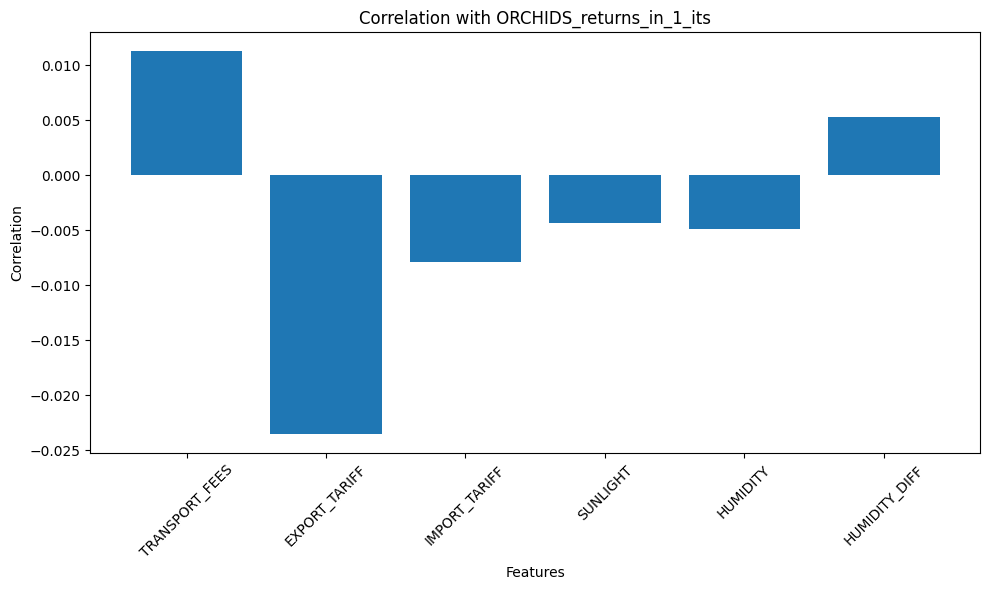

Iteration: 5
Correlation between TRANSPORT_FEES_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: -0.021358615083179527
Correlation between EXPORT_TARIFF_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: 0.0028814694781213977
Correlation between IMPORT_TARIFF_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: -0.03737567336364872
Correlation between SUNLIGHT_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: -0.010688883561248799
Correlation between HUMIDITY_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: -0.010389400609001736
Correlation between HUMIDITY_DIFF_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: 0.010542259772941223


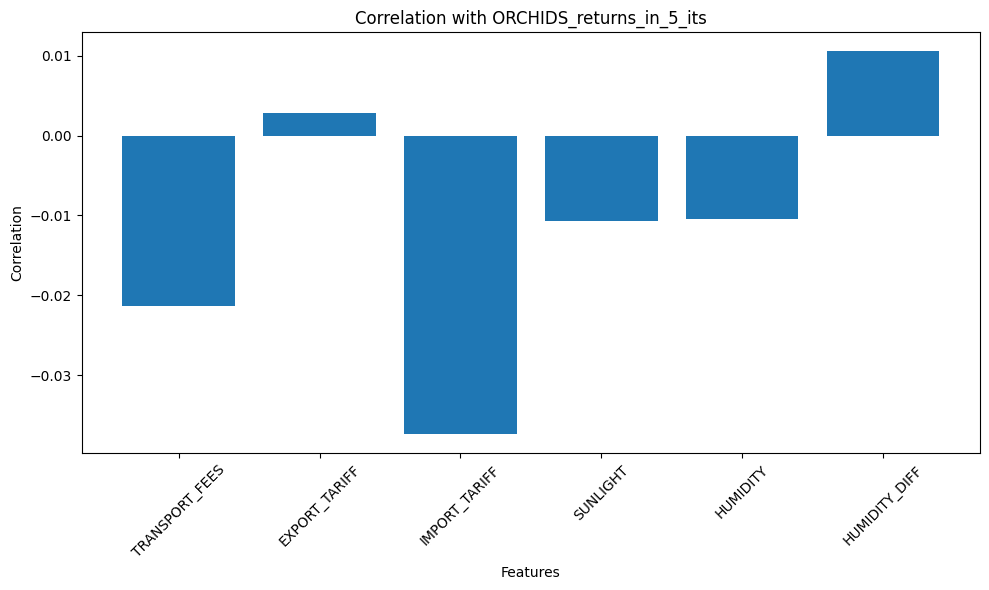

Iteration: 10
Correlation between TRANSPORT_FEES_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: -0.030193988649972674
Correlation between EXPORT_TARIFF_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: -0.021877370889119594
Correlation between IMPORT_TARIFF_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: -0.022413497387819944
Correlation between SUNLIGHT_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: -0.01708281928492128
Correlation between HUMIDITY_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: -0.013832914574449188
Correlation between HUMIDITY_DIFF_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: 0.015069485078278669


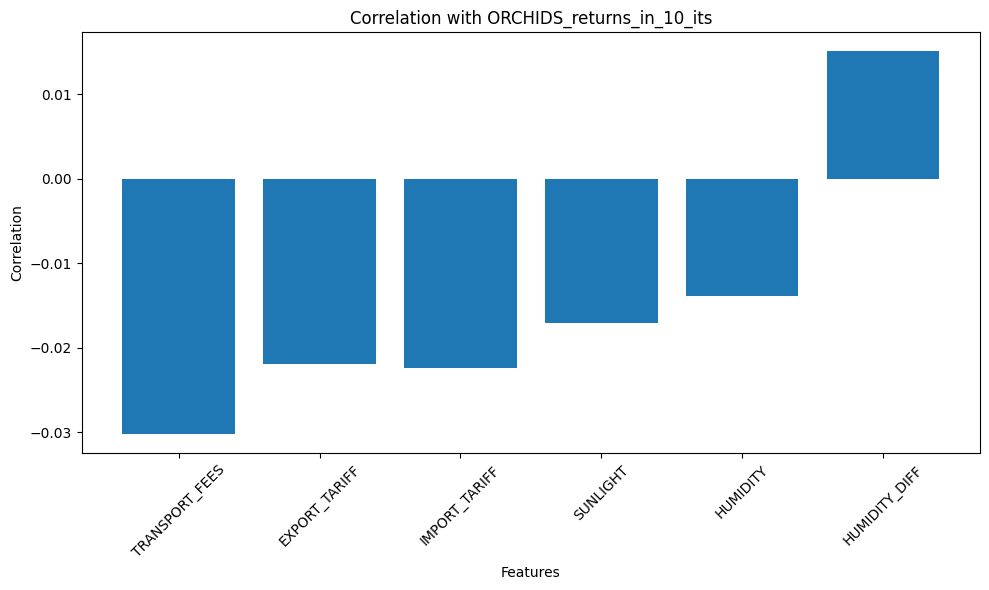

Iteration: 50
Correlation between TRANSPORT_FEES_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: 0.011437426835314459
Correlation between EXPORT_TARIFF_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: 0.07491295682776108
Correlation between IMPORT_TARIFF_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: -0.029922394536865397
Correlation between SUNLIGHT_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: -0.052736724981448574
Correlation between HUMIDITY_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: -0.022707206543812496
Correlation between HUMIDITY_DIFF_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: 0.061569449266334134


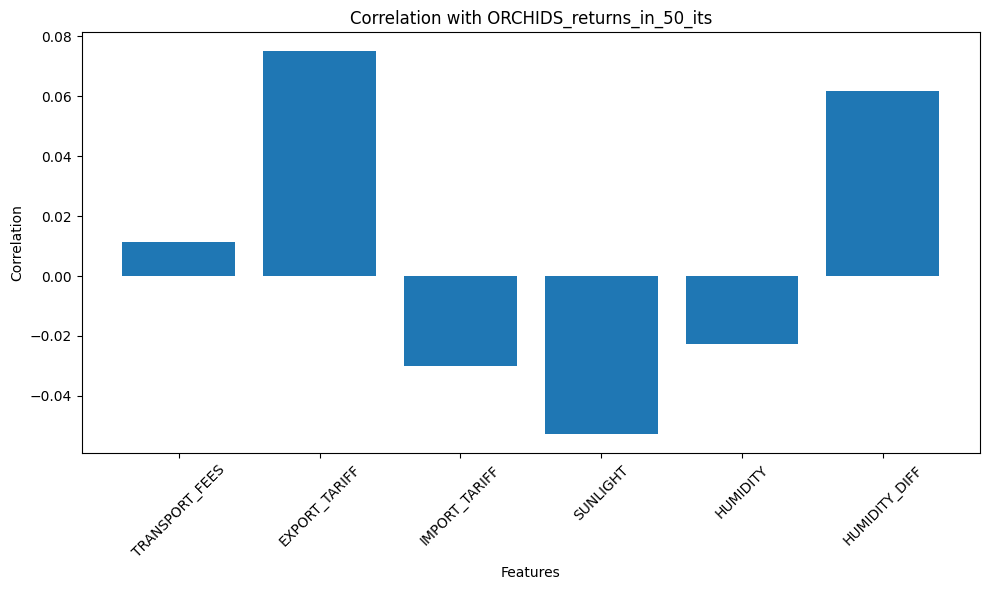

Iteration: 100
Correlation between TRANSPORT_FEES_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.0538919164696785
Correlation between EXPORT_TARIFF_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: 0.15924238844975355
Correlation between IMPORT_TARIFF_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.13135650276749844
Correlation between SUNLIGHT_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.08696893024064191
Correlation between HUMIDITY_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.02205231566478054
Correlation between HUMIDITY_DIFF_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: 0.08930565513816302


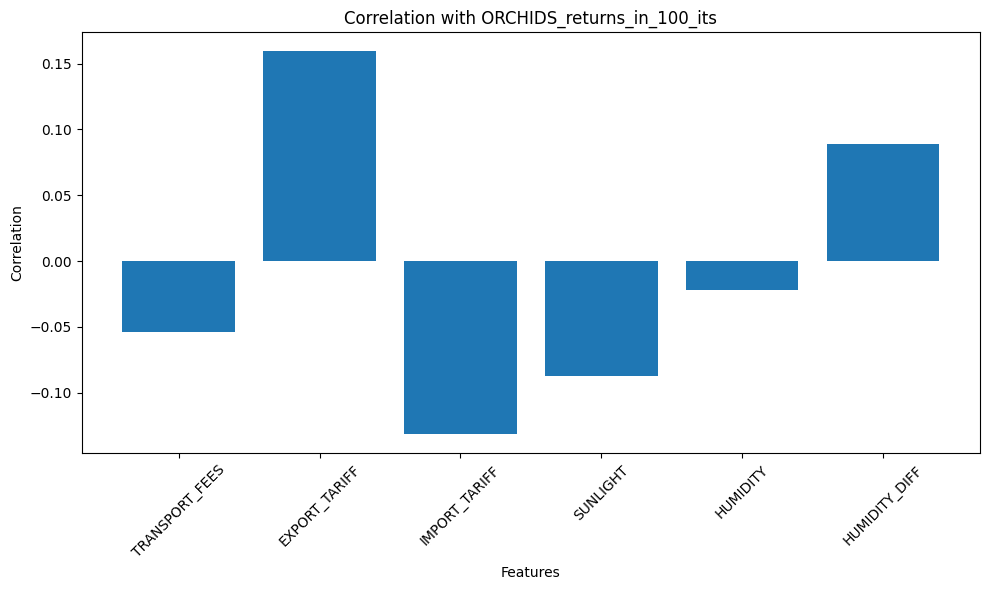

Iteration: 250
Correlation between TRANSPORT_FEES_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: -0.2784649111991953
Correlation between EXPORT_TARIFF_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: 0.16309827205608368
Correlation between IMPORT_TARIFF_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: 0.12030575973941324
Correlation between SUNLIGHT_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: -0.1350970952001932
Correlation between HUMIDITY_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: 0.006204574309757465
Correlation between HUMIDITY_DIFF_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: 0.06784906681139626


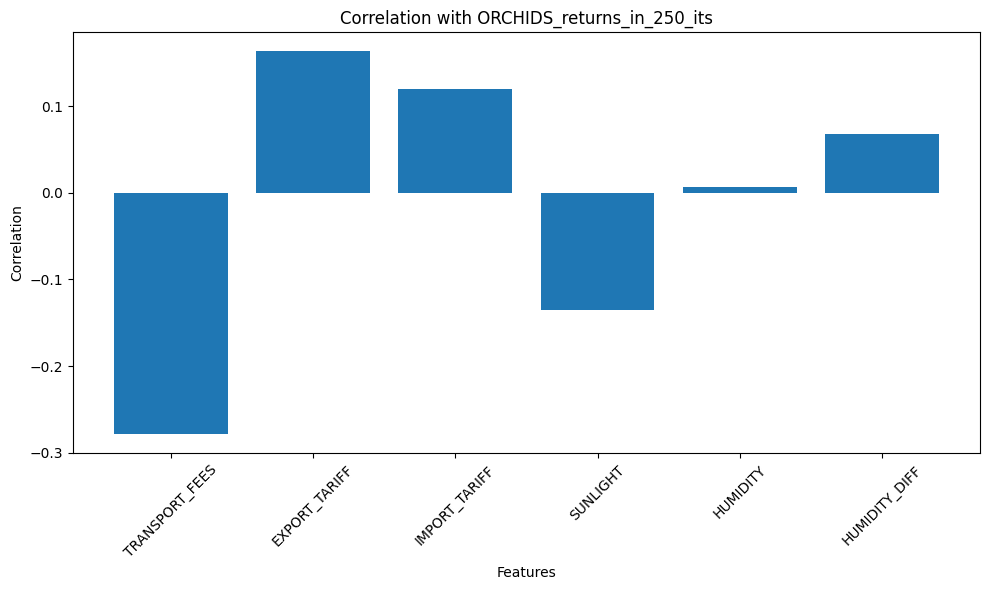

Iteration: 500
Correlation between TRANSPORT_FEES_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: 0.035739621750991234
Correlation between EXPORT_TARIFF_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: 0.3406702637502838
Correlation between IMPORT_TARIFF_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: 0.06201505781175201
Correlation between SUNLIGHT_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: -0.12510461140327592
Correlation between HUMIDITY_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: 0.12497989472401363
Correlation between HUMIDITY_DIFF_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: -0.17326958871900666


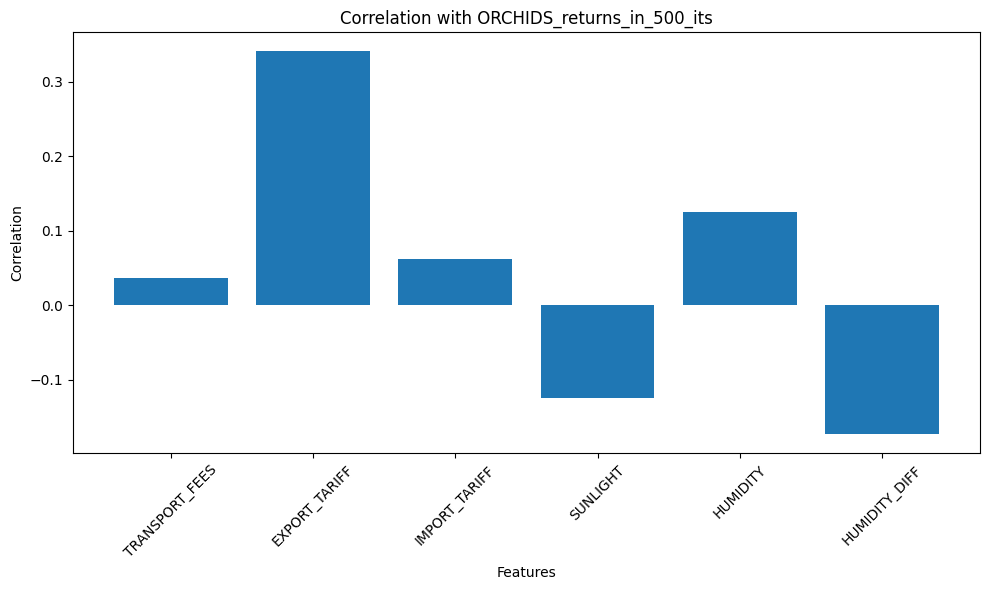

In [422]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'HUMIDITY_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        if col == 'ORCHIDS':
            new_df = get_future_returns(new_df, col, iteration)

    return new_df

def calculate_correlation(df, iteration):
    columns_to_process = ['TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'HUMIDITY_DIFF']
    correlations = {}

    for col in columns_to_process:
        corr = df[f"{col}_returns_from_{iteration}_its_ago"].corr(df[f"ORCHIDS_returns_in_{iteration}_its"], method='pearson')
        correlations[col] = corr

    return correlations

# Assuming you have your original DataFrame named 'df'
iteration_candidates = [1, 5, 10, 50, 100, 250, 500]

for iteration in iteration_candidates:
    print(f"Iteration: {iteration}")
    new_df = generate_returns_dataframe(df, iteration)
    correlations = calculate_correlation(new_df, iteration)

    # Print the correlation values
    for col, corr in correlations.items():
        print(f"Correlation between {col}_returns_from_{iteration}_its_ago and ORCHIDS_returns_in_{iteration}_its: {corr}")

    # Create a bar graph of the correlations
    plt.figure(figsize=(10, 6))
    plt.bar(correlations.keys(), correlations.values())
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.title(f"Correlation with ORCHIDS_returns_in_{iteration}_its")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Iteration: 1
Correlation between TRANSPORT_FEES_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: 0.011262510741877937
Correlation between EXPORT_TARIFF_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: -0.023539549366130074
Correlation between IMPORT_TARIFF_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: -0.007912049628264762
Correlation between SUNLIGHT_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: -0.004308073068789502
Correlation between HUMIDITY_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: -0.004916208774808026
Correlation between HUMIDITY_DIFF_returns_from_1_its_ago and ORCHIDS_returns_in_1_its: 0.005325146989004144


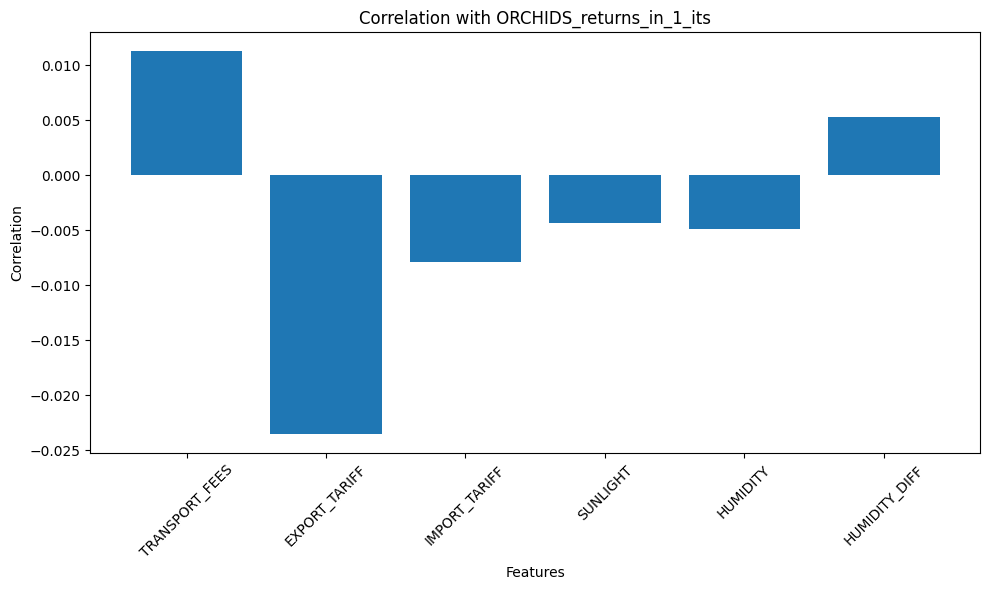

Iteration: 5
Correlation between TRANSPORT_FEES_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: -0.021358615083179527
Correlation between EXPORT_TARIFF_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: 0.0028814694781213977
Correlation between IMPORT_TARIFF_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: -0.03737567336364872
Correlation between SUNLIGHT_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: -0.010688883561248799
Correlation between HUMIDITY_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: -0.010389400609001736
Correlation between HUMIDITY_DIFF_returns_from_5_its_ago and ORCHIDS_returns_in_5_its: 0.010542259772941223


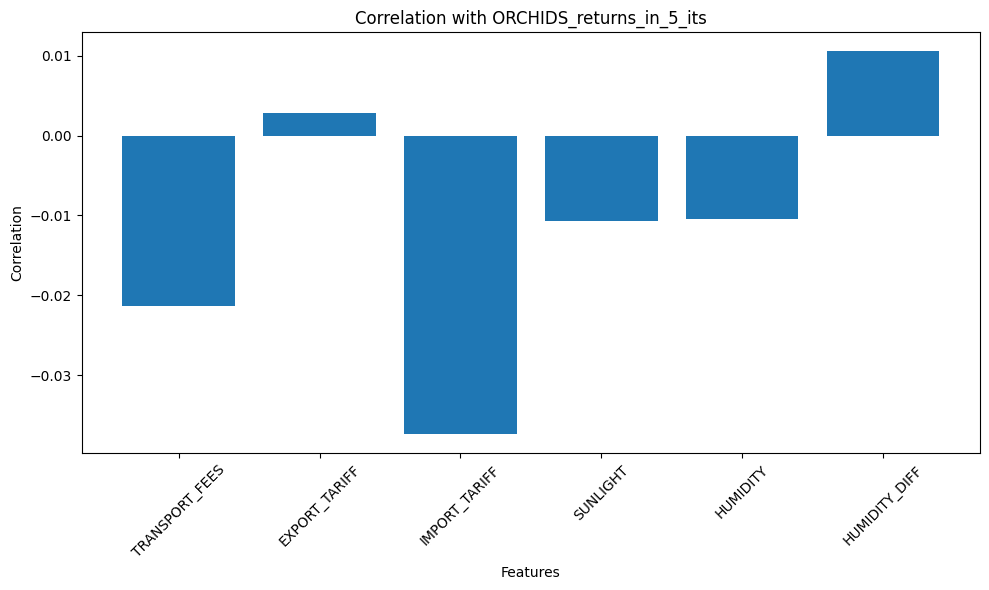

Iteration: 10
Correlation between TRANSPORT_FEES_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: -0.030193988649972674
Correlation between EXPORT_TARIFF_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: -0.021877370889119594
Correlation between IMPORT_TARIFF_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: -0.022413497387819944
Correlation between SUNLIGHT_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: -0.01708281928492128
Correlation between HUMIDITY_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: -0.013832914574449188
Correlation between HUMIDITY_DIFF_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: 0.015069485078278669


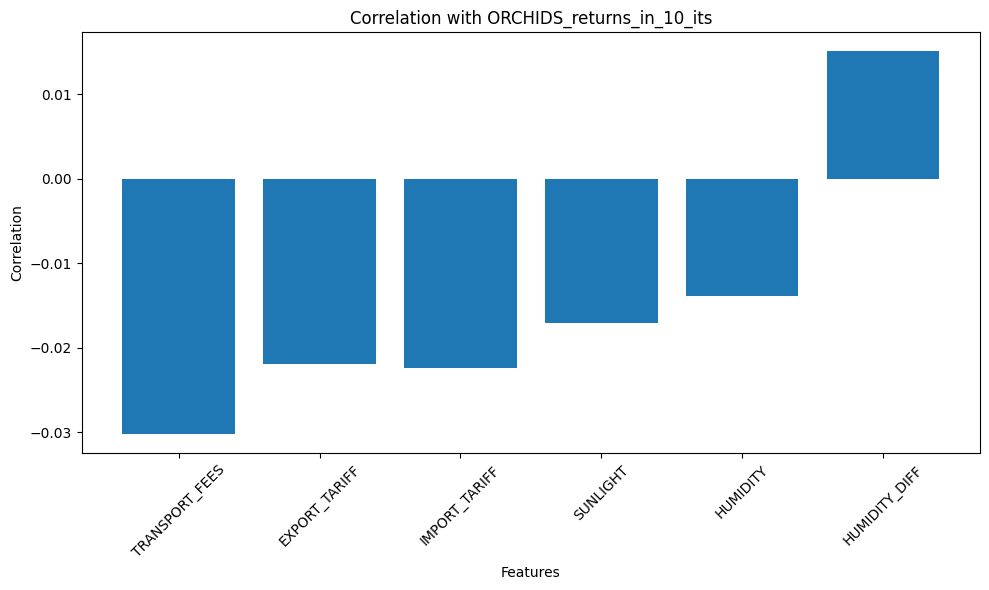

Iteration: 50
Correlation between TRANSPORT_FEES_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: 0.011437426835314459
Correlation between EXPORT_TARIFF_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: 0.07491295682776108
Correlation between IMPORT_TARIFF_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: -0.029922394536865397
Correlation between SUNLIGHT_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: -0.052736724981448574
Correlation between HUMIDITY_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: -0.022707206543812496
Correlation between HUMIDITY_DIFF_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: 0.061569449266334134


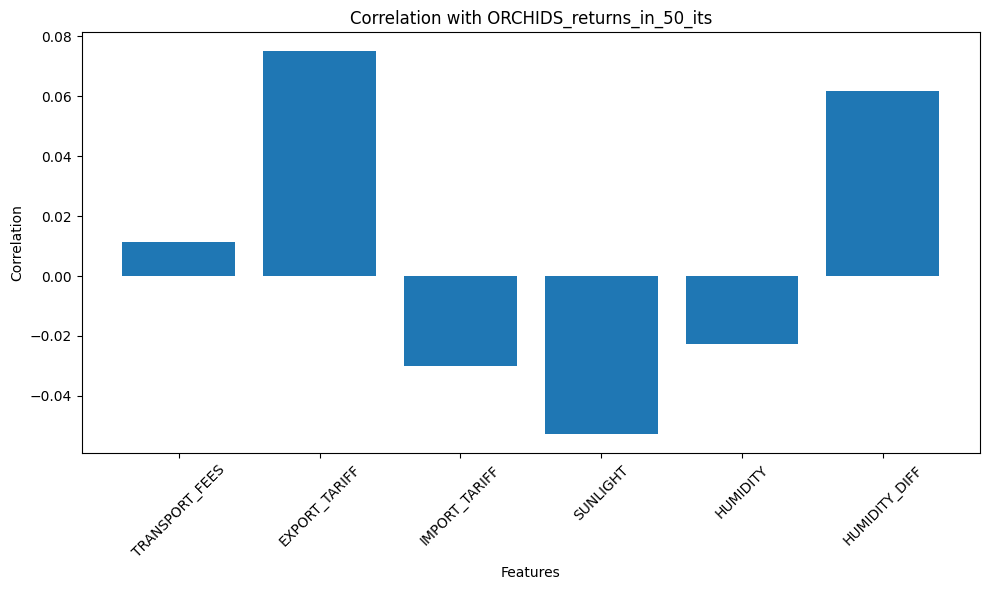

Iteration: 100
Correlation between TRANSPORT_FEES_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.0538919164696785
Correlation between EXPORT_TARIFF_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: 0.15924238844975355
Correlation between IMPORT_TARIFF_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.13135650276749844
Correlation between SUNLIGHT_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.08696893024064191
Correlation between HUMIDITY_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.02205231566478054
Correlation between HUMIDITY_DIFF_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: 0.08930565513816302


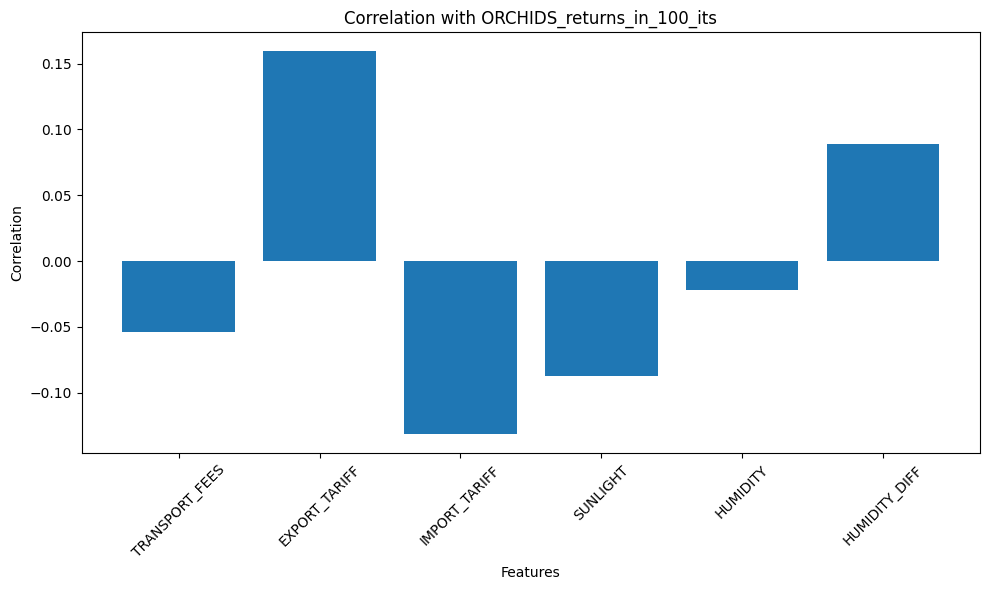

Iteration: 250
Correlation between TRANSPORT_FEES_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: -0.2784649111991953
Correlation between EXPORT_TARIFF_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: 0.16309827205608368
Correlation between IMPORT_TARIFF_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: 0.12030575973941324
Correlation between SUNLIGHT_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: -0.1350970952001932
Correlation between HUMIDITY_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: 0.006204574309757465
Correlation between HUMIDITY_DIFF_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: 0.06784906681139626


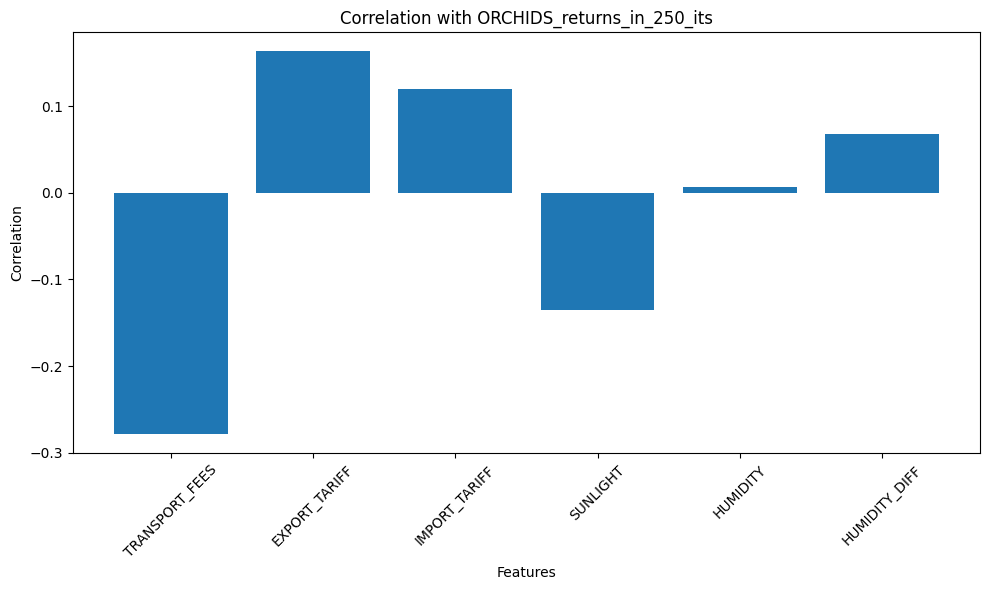

Iteration: 500
Correlation between TRANSPORT_FEES_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: 0.035739621750991234
Correlation between EXPORT_TARIFF_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: 0.3406702637502838
Correlation between IMPORT_TARIFF_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: 0.06201505781175201
Correlation between SUNLIGHT_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: -0.12510461140327592
Correlation between HUMIDITY_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: 0.12497989472401363
Correlation between HUMIDITY_DIFF_returns_from_500_its_ago and ORCHIDS_returns_in_500_its: -0.17326958871900666


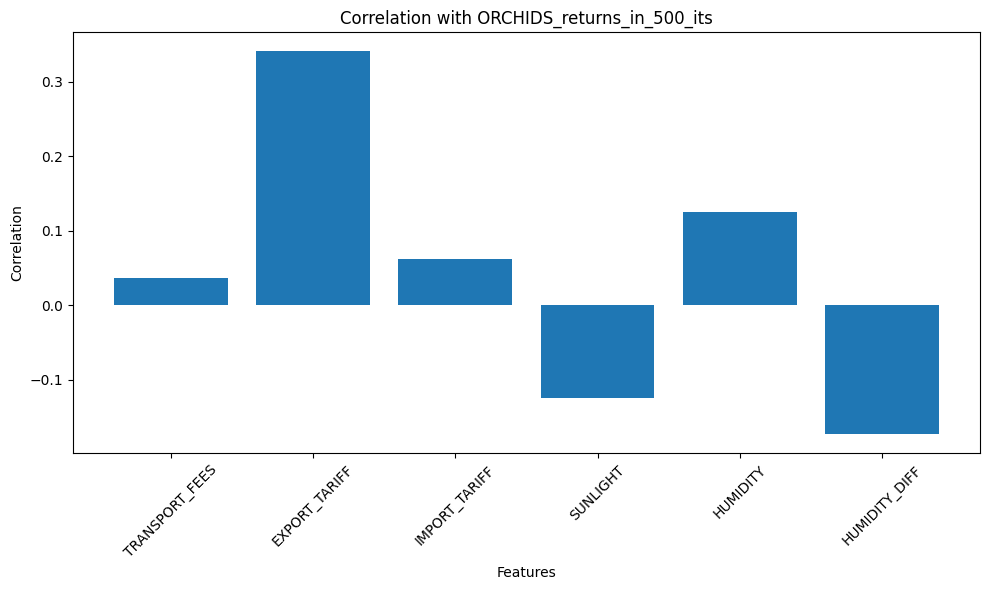

In [423]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'HUMIDITY_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        if col == 'ORCHIDS':
            new_df = get_future_returns(new_df, col, iteration)

    return new_df

def calculate_correlation(df, iteration):
    columns_to_process = ['TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'HUMIDITY_DIFF']
    correlations = {}

    for col in columns_to_process:
        corr = df[f"{col}_returns_from_{iteration}_its_ago"].corr(df[f"ORCHIDS_returns_in_{iteration}_its"], method='pearson')
        correlations[col] = corr

    return correlations

# Assuming you have your original DataFrame named 'df'
iteration_candidates = [1, 5, 10, 50, 100, 250, 500]

for iteration in iteration_candidates:
    print(f"Iteration: {iteration}")
    new_df = generate_returns_dataframe(df, iteration)
    correlations = calculate_correlation(new_df, iteration)

    # Print the correlation values
    for col, corr in correlations.items():
        print(f"Correlation between {col}_returns_from_{iteration}_its_ago and ORCHIDS_returns_in_{iteration}_its: {corr}")

    # Create a bar graph of the correlations
    plt.figure(figsize=(10, 6))
    plt.bar(correlations.keys(), correlations.values())
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.title(f"Correlation with ORCHIDS_returns_in_{iteration}_its")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Iteration: 100
Correlation between ORCHIDS_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.037780744518874296
Correlation between TRANSPORT_FEES_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.0538919164696785
Correlation between EXPORT_TARIFF_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: 0.15924238844975355
Correlation between IMPORT_TARIFF_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.13135650276749844
Correlation between SUNLIGHT_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.08696893024064191
Correlation between HUMIDITY_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: -0.02205231566478054
Correlation between HUMIDITY_DIFF_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: 0.08930565513816302
Iteration: 150
Correlation between ORCHIDS_returns_from_150_its_ago and ORCHIDS_returns_in_150_its: 0.031753404348641476
Correlation between TRANSPORT_FEES_returns_from_150_its_ago and ORCHIDS_returns_in_150_its: -0.17

/Users/liuer/opt/anaconda3/envs/unborked/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning:

invalid value encountered in subtract



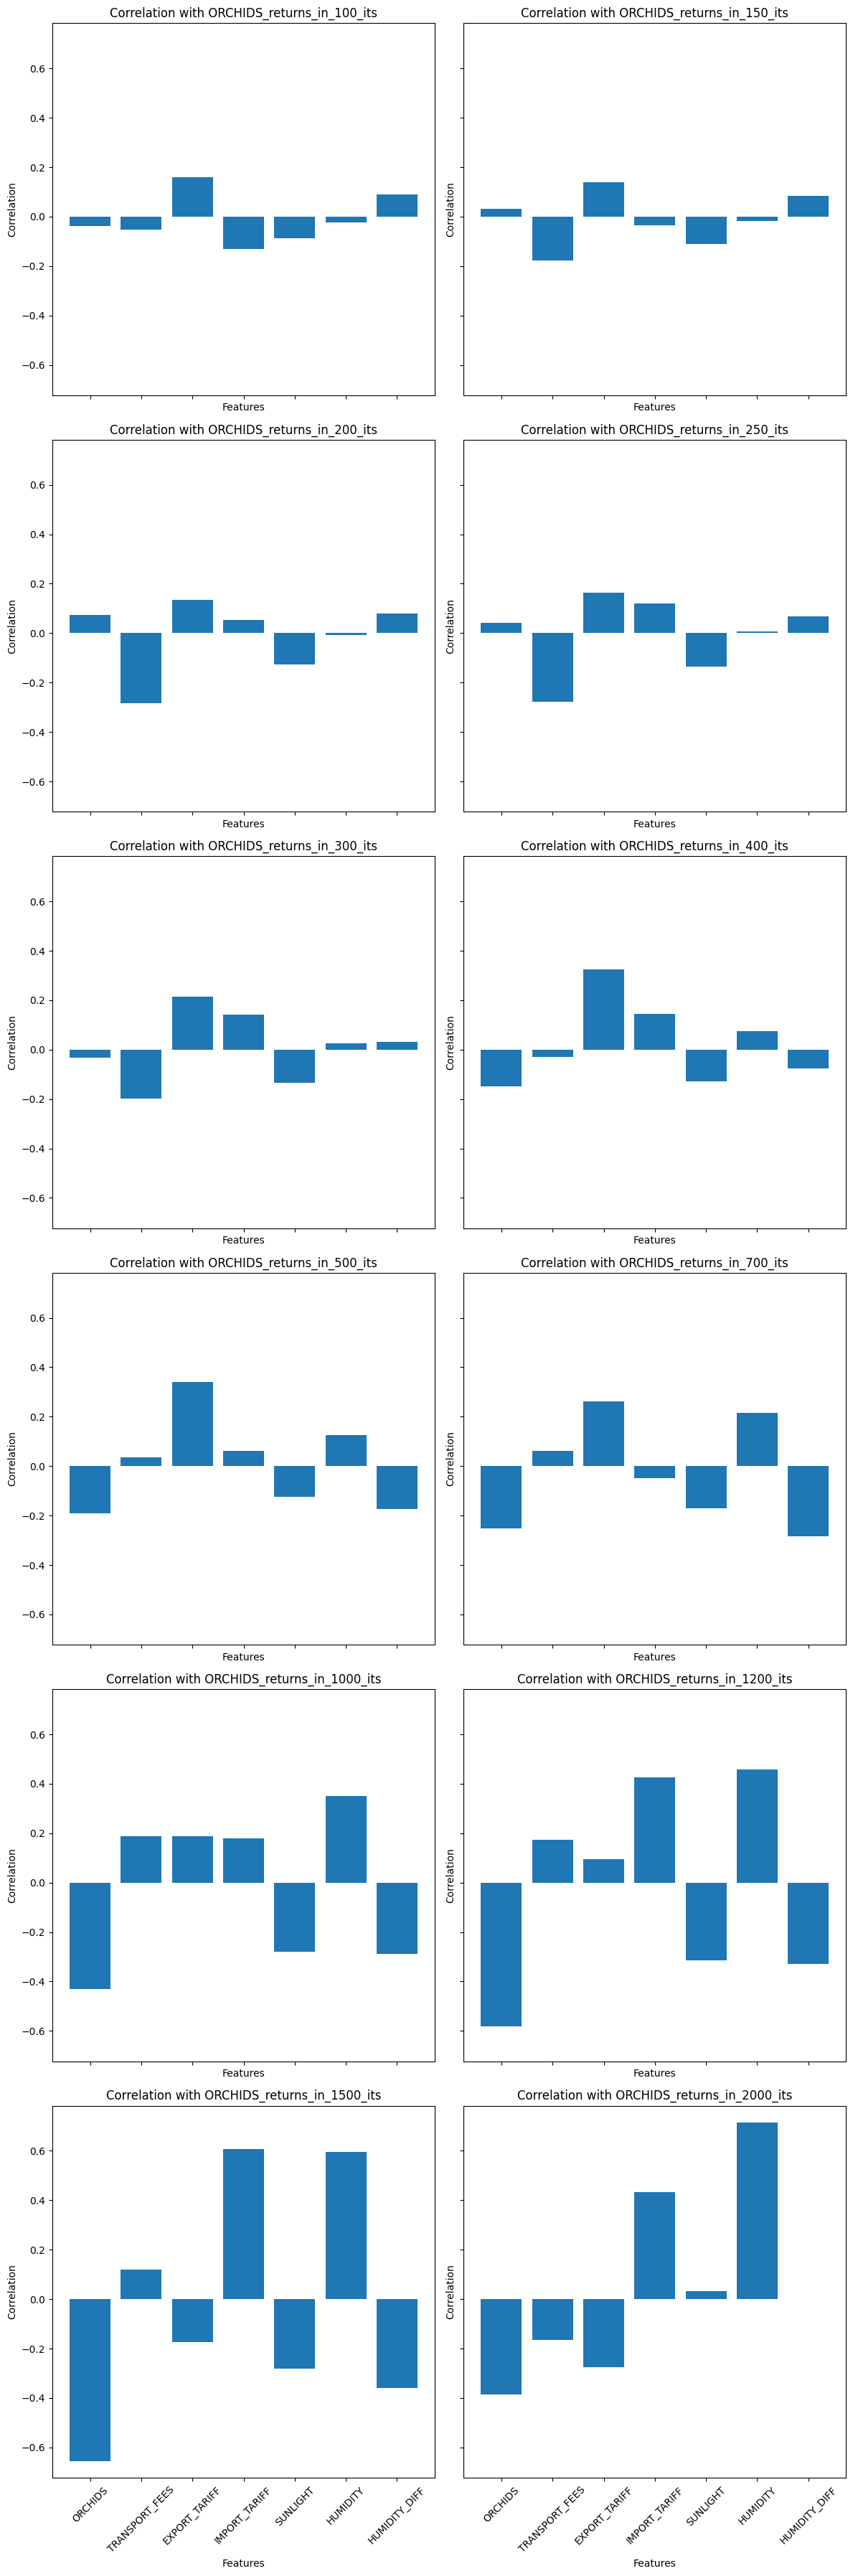

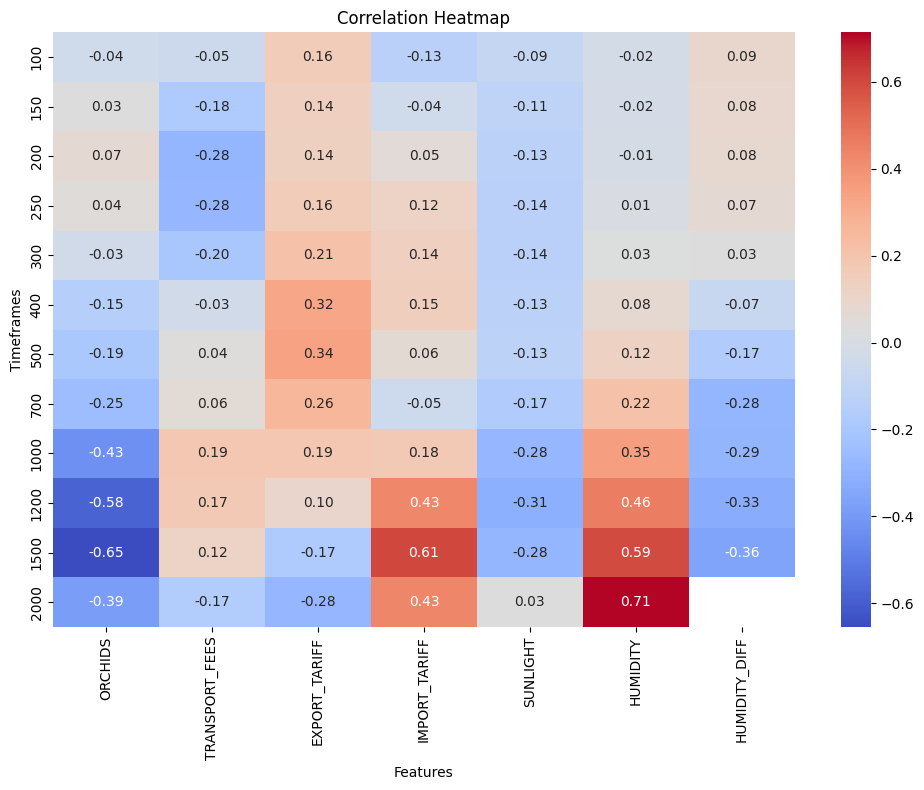

In [424]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'HUMIDITY_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        new_df = get_future_returns(new_df, col, iteration)

    return new_df

def calculate_correlation(df, iteration):
    columns_to_process = ['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'HUMIDITY_DIFF']
    correlations = {}

    for col in columns_to_process:
        corr = df[f"{col}_returns_from_{iteration}_its_ago"].corr(df[f"ORCHIDS_returns_in_{iteration}_its"], method='pearson')
        correlations[col] = corr

    return correlations

# Assuming you have your original DataFrame named 'df'
iteration_candidates = [100, 150, 200, 250, 300, 400, 500, 700, 1000, 1200, 1500, 2000]
correlation_data = {}

for iteration in iteration_candidates:
    print(f"Iteration: {iteration}")
    new_df = generate_returns_dataframe(df, iteration)
    correlations = calculate_correlation(new_df, iteration)
    correlation_data[iteration] = correlations

    # Print the correlation values
    for col, corr in correlations.items():
        print(f"Correlation between {col}_returns_from_{iteration}_its_ago and ORCHIDS_returns_in_{iteration}_its: {corr}")

# Create a grid of bar charts
num_iterations = len(iteration_candidates)
num_cols = 2
num_rows = (num_iterations + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows), sharex=True, sharey=True)
axes = axes.flatten()

for i, iteration in enumerate(iteration_candidates):
    ax = axes[i]
    correlations = correlation_data[iteration]
    ax.bar(correlations.keys(), correlations.values())
    ax.set_xlabel('Features')
    ax.set_ylabel('Correlation')
    ax.set_title(f"Correlation with ORCHIDS_returns_in_{iteration}_its")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create a heatmap
heatmap_data = pd.DataFrame(correlation_data).T
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Features')
plt.ylabel('Timeframes')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Iteration: 100
Correlation between ORCHIDS_returns_from_100_its_ago and ORCHIDS_returns_in_500_its: -0.06589416041400281
Correlation between TRANSPORT_FEES_returns_from_100_its_ago and ORCHIDS_returns_in_500_its: -0.09126233362490499
Correlation between EXPORT_TARIFF_returns_from_100_its_ago and ORCHIDS_returns_in_500_its: 0.1629060280951892
Correlation between IMPORT_TARIFF_returns_from_100_its_ago and ORCHIDS_returns_in_500_its: 0.048974758396420646
Correlation between SUNLIGHT_returns_from_100_its_ago and ORCHIDS_returns_in_500_its: -0.15888275441210506
Correlation between HUMIDITY_returns_from_100_its_ago and ORCHIDS_returns_in_500_its: 0.0360770463020351
Correlation between HUMIDITY_DIFF_returns_from_100_its_ago and ORCHIDS_returns_in_500_its: -0.06656971549041443
Iteration: 150
Correlation between ORCHIDS_returns_from_150_its_ago and ORCHIDS_returns_in_500_its: -0.07809624095166551
Correlation between TRANSPORT_FEES_returns_from_150_its_ago and ORCHIDS_returns_in_500_its: -0.0942

/Users/liuer/opt/anaconda3/envs/unborked/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning:

invalid value encountered in subtract



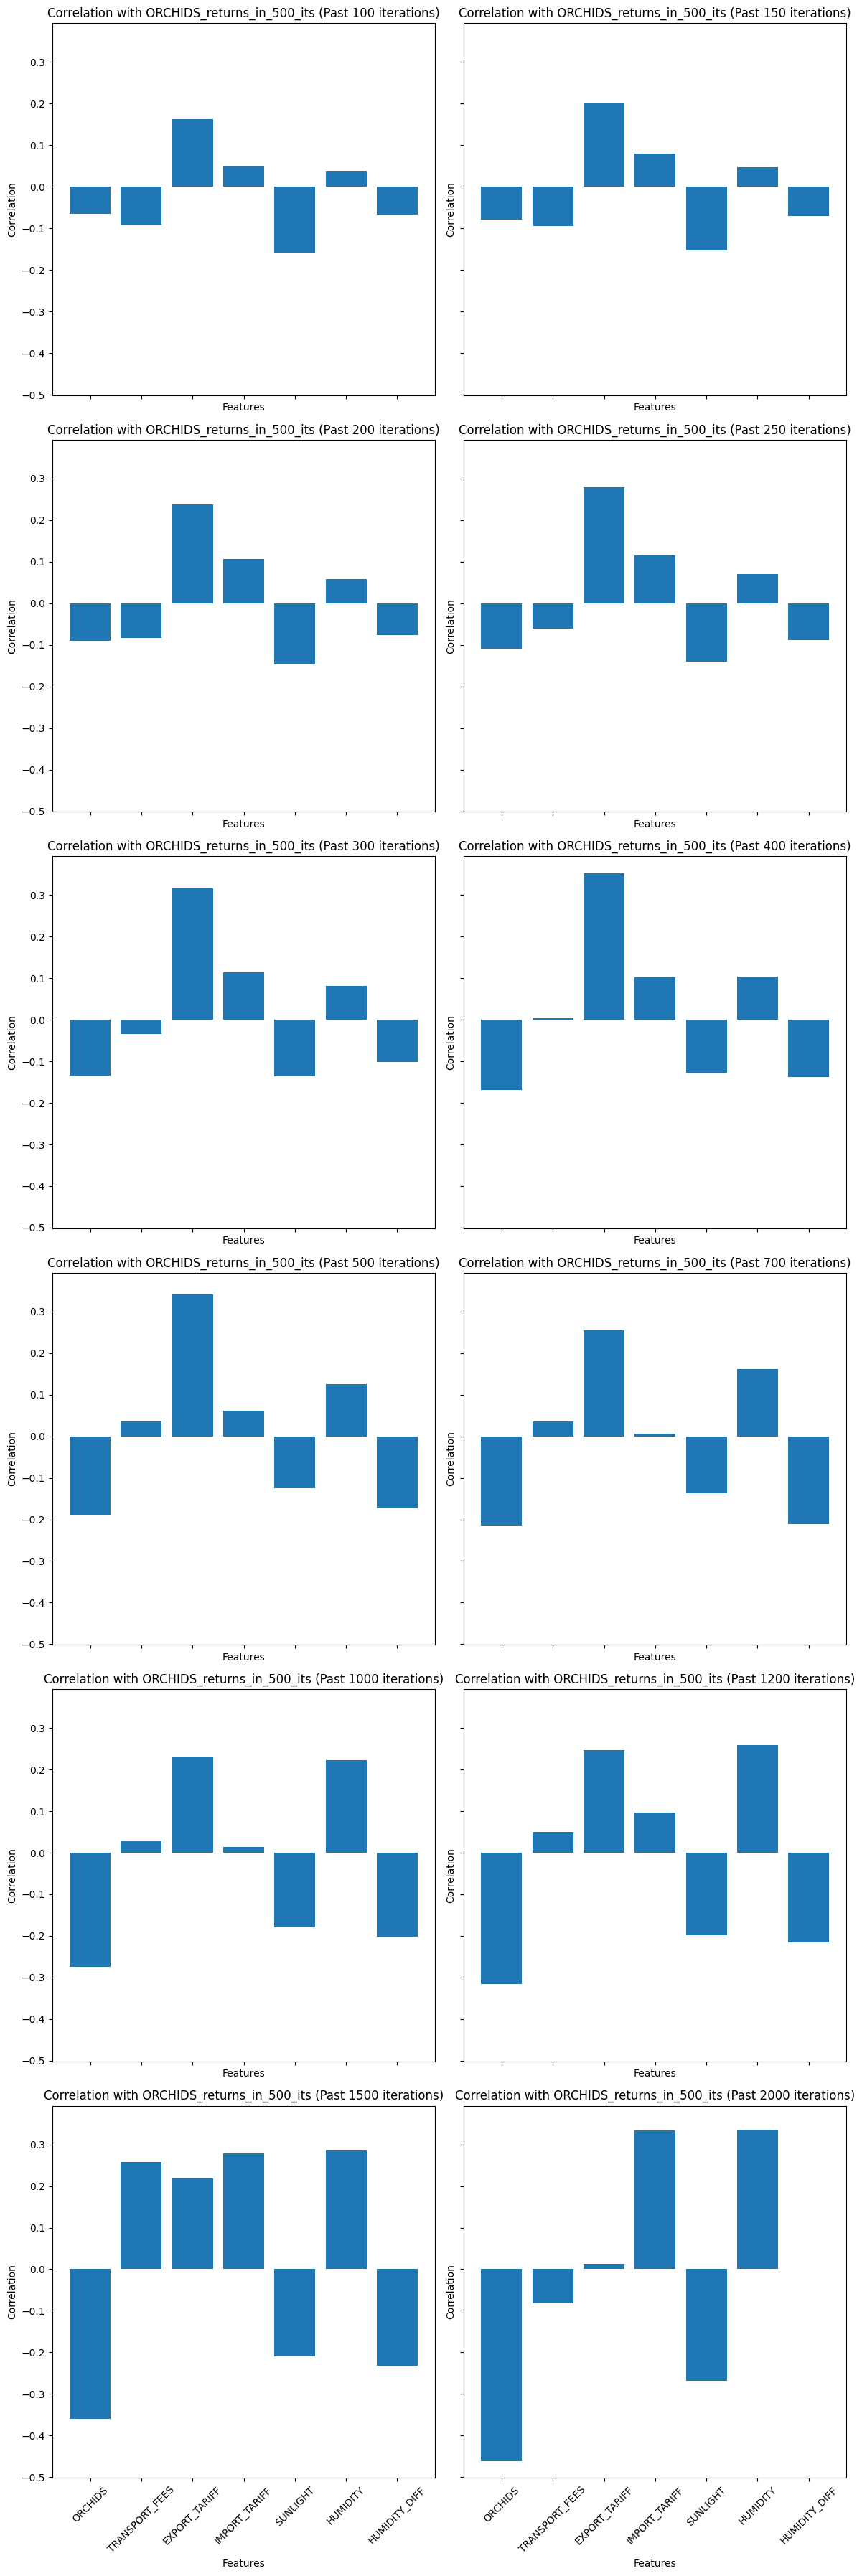

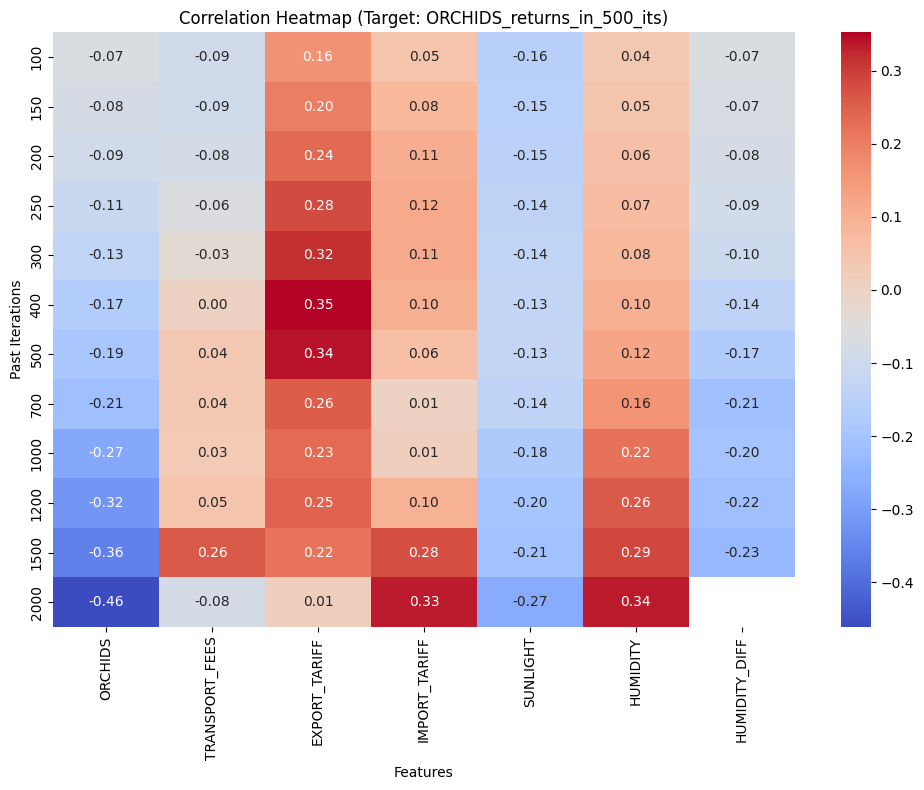

In [425]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'HUMIDITY_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        if col == 'ORCHIDS':
            new_df = get_future_returns(new_df, col, 500)  # Standardize to 500 iterations for ORCHIDS' future returns

    return new_df

def calculate_correlation(df, iteration):
    columns_to_process = ['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'HUMIDITY_DIFF']
    correlations = {}

    for col in columns_to_process:
        corr = df[f"{col}_returns_from_{iteration}_its_ago"].corr(df["ORCHIDS_returns_in_500_its"], method='pearson')
        correlations[col] = corr

    return correlations

# Assuming you have your original DataFrame named 'df'
iteration_candidates = [100, 150, 200, 250, 300, 400, 500, 700, 1000, 1200, 1500, 2000]
correlation_data = {}

for iteration in iteration_candidates:
    print(f"Iteration: {iteration}")
    new_df = generate_returns_dataframe(df, iteration)
    correlations = calculate_correlation(new_df, iteration)
    correlation_data[iteration] = correlations

    # Print the correlation values
    for col, corr in correlations.items():
        print(f"Correlation between {col}_returns_from_{iteration}_its_ago and ORCHIDS_returns_in_500_its: {corr}")

# Create a grid of bar charts
num_iterations = len(iteration_candidates)
num_cols = 2
num_rows = (num_iterations + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows), sharex=True, sharey=True)
axes = axes.flatten()

for i, iteration in enumerate(iteration_candidates):
    ax = axes[i]
    correlations = correlation_data[iteration]
    ax.bar(correlations.keys(), correlations.values())
    ax.set_xlabel('Features')
    ax.set_ylabel('Correlation')
    ax.set_title(f"Correlation with ORCHIDS_returns_in_500_its (Past {iteration} iterations)")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create a heatmap
heatmap_data = pd.DataFrame(correlation_data).T
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Features')
plt.ylabel('Past Iterations')
plt.title("Correlation Heatmap (Target: ORCHIDS_returns_in_500_its)")
plt.tight_layout()
plt.show()

linear regression: 

target: orchids returns in 500 its

features:
- orchids_returns in last 700 its
- export tariff last 500 its 
- humidity_diff last 700 its 
- 

In [426]:
df_humidity_over_10 = df[df['HUMIDITY_DIFF'] >= 10]

In [427]:
df_humidity_over_10

timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0             0  1111.75             1.5           10.5           -2.0   
1           100  1111.75             1.5           10.5           -2.0   
2           200  1109.75             1.5           10.5           -2.0   
3           300  1109.25             1.5           10.5           -2.0   
4           400  1110.75             1.5           10.5           -2.0   
...         ...      ...             ...            ...            ...   
6496     649600  1015.75             1.6            9.5           -2.4   
6497     649700  1016.25             1.6            9.5           -2.4   
6498     649800  1017.25             1.6            9.5           -2.4   
6499     649900  1016.25             1.6            9.5           -2.4   
6500     650000  1015.75             1.6            9.5           -2.4   

       SUNLIGHT   HUMIDITY  HUMIDITY_DIFF  ORCHIDS_returns_from_100_its_ago  
0     4500.0000  95.000000      25.000000                               NaN  
1     4500.0356  94.995990      24.995990                               NaN  
2     4500.0700  94.991980      24.991980                               NaN  
3     4500.1016  94.987970      24.987970                               NaN  
4     4500.1313  94.983950      24.983950                               NaN  
...         ...        ...            ...                               ...  
6496  2249.9507  59.999588      10.000412                          0.006939  
6497  2249.9688  59.999580      10.000420                          0.007435  
6498  2249.9830  59.999650      10.000350                          0.007428  
6499  2249.9934  59.999786      10.000214                          0.006936  
6500  2250.0000  60.000000      10.000000                          0.006939  

[2768 rows x 9 columns]

Iteration: 10
Correlation between HUMIDITY_DIFF_returns_from_10_its_ago and ORCHIDS_returns_in_10_its: 0.03515132342175575
Iteration: 50
Correlation between HUMIDITY_DIFF_returns_from_50_its_ago and ORCHIDS_returns_in_50_its: 0.15229698252254154
Iteration: 75
Correlation between HUMIDITY_DIFF_returns_from_75_its_ago and ORCHIDS_returns_in_75_its: 0.20992385542943212
Iteration: 87
Correlation between HUMIDITY_DIFF_returns_from_87_its_ago and ORCHIDS_returns_in_87_its: 0.22924694259922446
Iteration: 100
Correlation between HUMIDITY_DIFF_returns_from_100_its_ago and ORCHIDS_returns_in_100_its: 0.23415144742575636
Iteration: 150
Correlation between HUMIDITY_DIFF_returns_from_150_its_ago and ORCHIDS_returns_in_150_its: 0.21366795369197722
Iteration: 200
Correlation between HUMIDITY_DIFF_returns_from_200_its_ago and ORCHIDS_returns_in_200_its: 0.1969605942654459
Iteration: 250
Correlation between HUMIDITY_DIFF_returns_from_250_its_ago and ORCHIDS_returns_in_250_its: 0.16659562195987412
Itera

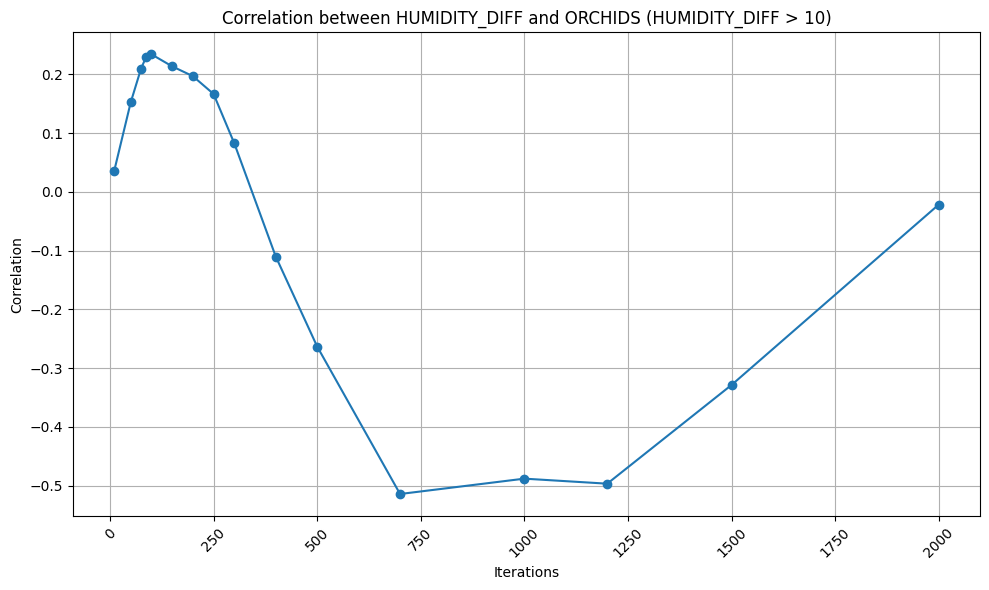

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['ORCHIDS', 'HUMIDITY_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        new_df = get_future_returns(new_df, col, iteration)  # Use the same iteration for both HUMIDITY_DIFF and ORCHIDS

    return new_df

def calculate_correlation(df, iteration):
    columns_to_process = ['HUMIDITY_DIFF']
    correlations = {}

    for col in columns_to_process:
        corr = df[f"{col}_returns_from_{iteration}_its_ago"].corr(df[f"ORCHIDS_returns_in_{iteration}_its"], method='pearson')
        correlations[col] = corr

    return correlations

# Assuming you have your original DataFrame named 'df'
iteration_candidates = [10, 50, 75, 87, 100, 150, 200, 250, 300, 400, 500, 700, 1000, 1200, 1500, 2000]
correlation_data = {}

for iteration in iteration_candidates:
    print(f"Iteration: {iteration}")
    new_df = generate_returns_dataframe(df, iteration)
    new_df = new_df[new_df['HUMIDITY_DIFF'] > 10]  # Restrict to only when HUMIDITY_DIFF > 10
    correlations = calculate_correlation(new_df, iteration)
    correlation_data[iteration] = correlations

    # Print the correlation values
    for col, corr in correlations.items():
        print(f"Correlation between {col}_returns_from_{iteration}_its_ago and ORCHIDS_returns_in_{iteration}_its: {corr}")

# Create a line plot of the correlations
plt.figure(figsize=(10, 6))
plt.plot(iteration_candidates, [correlation_data[i]['HUMIDITY_DIFF'] for i in iteration_candidates], marker='o')
plt.xlabel('Iterations')
plt.ylabel('Correlation')
plt.title("Correlation between HUMIDITY_DIFF and ORCHIDS (HUMIDITY_DIFF > 10)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [429]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['ORCHIDS', 'HUMIDITY_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        new_df = get_future_returns(new_df, col, iteration)

    return new_df

# Assuming you have your original DataFrame named 'df'
iteration = 100

# Generate the returns DataFrame
new_df = generate_returns_dataframe(df, iteration).dropna()

# Restrict the DataFrame to HUMIDITY_DIFF >= 10
new_df = new_df[new_df['HUMIDITY_DIFF'] >= 10]

# Prepare the input features (X) and target variable (y) for linear regression
X = new_df[f"HUMIDITY_DIFF_returns_from_{iteration}_its_ago"].values.reshape(-1, 1)
y = new_df[f"ORCHIDS_returns_in_{iteration}_its"].values.reshape(-1, 1)

# Create a linear regression model with no constant term
model = LinearRegression(fit_intercept=False)

# Fit the model
model.fit(X, y)

# Print the coefficient (slope) of the linear regression
coefficient = model.coef_[0][0]
print(f"Coefficient (Slope) of Linear Regression: {coefficient}")

Coefficient (Slope) of Linear Regression: 0.054364026489333764


In [404]:
new_df

timestamp      ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
100       10000  1114.873322             1.5           10.5           -2.0   
101       10100  1114.917391             1.5           10.5           -2.0   
102       10200  1114.959234             1.5           10.5           -2.0   
103       10300  1115.049206             1.5           10.5           -2.0   
104       10400  1115.122080             1.5           10.5           -2.0   
...         ...          ...             ...            ...            ...   
6496     649600  1012.020488             1.6            9.5           -2.4   
6497     649700  1012.231964             1.6            9.5           -2.4   
6498     649800  1012.482866             1.6            9.5           -2.4   
6499     649900  1012.671222             1.6            9.5           -2.4   
6500     650000  1012.825161             1.6            9.5           -2.4   

       SUNLIGHT   HUMIDITY  HUMIDITY_DIFF  ORCHIDS_returns_from_100_its_ago  \
100   4493.8555  94.591385      24.591385                          0.002809   
101   4493.6978  94.587240      24.587240                          0.002849   
102   4493.5376  94.583100      24.583100                          0.003520   
103   4493.3760  94.578950      24.578950                          0.004039   
104   4493.2124  94.574810      24.574810                          0.004067   
...         ...        ...            ...                               ...   
6496  2249.9507  59.999588      10.000412                         -0.002585   
6497  2249.9688  59.999580      10.000420                         -0.002087   
6498  2249.9830  59.999650      10.000350                         -0.001613   
6499  2249.9934  59.999786      10.000214                         -0.001187   
6500  2250.0000  60.000000      10.000000                         -0.000783   

      ORCHIDS_returns_in_100_its  HUMIDITY_DIFF_returns_from_100_its_ago  \
100                    -0.000162                               -0.016345   
101                    -0.000154                               -0.016353   
102                    -0.000169                               -0.016360   
103                    -0.000183                               -0.016369   
104                    -0.000163                               -0.016376   
...                          ...                                     ...   
6496                    0.007692                                0.034723   
6497                    0.007281                                0.034048   
6498                    0.006767                                0.033371   
6499                    0.006353                                0.032695   
6500                    0.005973                                0.032017   

      HUMIDITY_DIFF_returns_in_100_its  
100                          -0.016925  
101                          -0.016928  
102                          -0.016932  
103                          -0.016935  
104                          -0.016938  
...                                ...  
6496                         -0.033270  
6497                         -0.033909  
6498                         -0.034546  
6499                         -0.035182  
6500                         -0.035815  

[2668 rows x 12 columns]

In [430]:

df_day_0 = pd.read_csv(f"./round-2-island-data-bottle/prices_round_2_day_{0}.csv", sep=";", header=0)
df_day_1 = pd.read_csv(f"./round-2-island-data-bottle/prices_round_2_day_{1}.csv", sep=";", header=0)

In [431]:
df_day_0 = df_day_0[['timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF','SUNLIGHT', 'HUMIDITY']]
df_day_0.loc[:, 'ORCHIDS'] = df_day_0['ORCHIDS'].ewm(alpha = 0.05).mean().reset_index(drop=True)
df_day_0['HUMIDITY_DIFF'] = np.abs(df_day_0["HUMIDITY"] - 70)

In [432]:
df_day_1 = df_day_1[['timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF','SUNLIGHT', 'HUMIDITY']]
df_day_1.loc[:, 'ORCHIDS'] = df_day_1['ORCHIDS'].ewm(alpha = 0.05).mean().reset_index(drop=True)
df_day_1['HUMIDITY_DIFF'] = np.abs(df_day_1["HUMIDITY"] - 70)

In [442]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['ORCHIDS', 'HUMIDITY_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        new_df = get_future_returns(new_df, col, iteration)

    return new_df

# Assuming you have your dataframes named 'df_day_0' and 'df_day_1'
iteration = 100

# Generate the returns DataFrame for df_day_0
df_day_0_returns = generate_returns_dataframe(df_day_0, iteration).dropna()
df_day_0_returns = df_day_0_returns[df_day_0_returns['HUMIDITY_DIFF'] >= 15]

# Generate the returns DataFrame for df_day_1
df_day_1_returns = generate_returns_dataframe(df_day_1, iteration).dropna()
df_day_1_returns = df_day_1_returns[df_day_1_returns['HUMIDITY_DIFF'] >= 15]

# Concatenate the two DataFrames vertically
combined_df = pd.concat([df_day_0_returns, df_day_1_returns], ignore_index=True)

# Prepare the input features (X) and target variable (y) for linear regression
X = combined_df[f"HUMIDITY_DIFF_returns_from_{iteration}_its_ago"].values.reshape(-1, 1)
y = combined_df[f"ORCHIDS_returns_in_{iteration}_its"].values.reshape(-1, 1)

# Create a linear regression model with no constant term
model = LinearRegression(fit_intercept=False)

# Fit the model
model.fit(X, y)

# Get the coefficient (slope) of the linear regression
coefficient = model.coef_[0][0]

# Generate the equation
equation = f"ORCHIDS_returns_in_{iteration}_its = {coefficient:.4f} * HUMIDITY_DIFF_returns_from_{iteration}_its_ago"
print("Equation:")
print(equation)

# Make predictions using the fitted model
y_pred = model.predict(X)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.4f}")

# Calculate R-squared value
r2 = r2_score(y, y_pred)
print(f"R-squared (R^2) Value: {r2:.4f}")

Equation:
ORCHIDS_returns_in_100_its = 0.0688 * HUMIDITY_DIFF_returns_from_100_its_ago

Mean Squared Error (MSE): 0.0000
R-squared (R^2) Value: 0.2672


In [443]:
df_day_neg_1 = pd.read_csv(f"./round-2-island-data-bottle/prices_round_2_day_{-1}.csv", sep=";", header=0)

In [444]:
df_day_neg_1 = df_day_neg_1[['timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF','SUNLIGHT', 'HUMIDITY']]
df_day_neg_1.loc[:, 'ORCHIDS'] = df_day_neg_1['ORCHIDS'].ewm(alpha = 0.05).mean().reset_index(drop=True)
df_day_neg_1['HUMIDITY_DIFF'] = np.abs(df_day_neg_1["HUMIDITY"] - 70)

In [446]:
import pandas as pd
from sklearn.metrics import r2_score

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['ORCHIDS', 'HUMIDITY_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        new_df = get_future_returns(new_df, col, iteration)

    return new_df

# Assuming you have your dataframe named 'df_day_neg_1'
iteration = 100

# Generate the returns DataFrame for df_day_neg_1
df_day_neg_1_returns = generate_returns_dataframe(df_day_neg_1, iteration).dropna()
df_day_neg_1_returns = df_day_neg_1_returns[df_day_neg_1_returns['HUMIDITY_DIFF'] >= 15]

# Prepare the input features (X) for prediction
X = df_day_neg_1_returns[f"HUMIDITY_DIFF_returns_from_{iteration}_its_ago"].values.reshape(-1, 1)

# Use the learned coefficient to make predictions
coefficient = 0.0471  # Replace with the coefficient from your learned equation
y_pred = coefficient * X

# Add the predicted values as a new column in the DataFrame
df_day_neg_1_returns[f"ORCHIDS_returns_in_{iteration}_its_predicted"] = y_pred

# Get the actual ORCHIDS future returns
y_true = df_day_neg_1_returns[f"ORCHIDS_returns_in_{iteration}_its"].values.reshape(-1, 1)

# Calculate the test R-squared value
test_r2 = r2_score(y_true, y_pred)

# Print the test R-squared value
print(f"Test R-squared (R^2) Value: {test_r2:.4f}")

# Print the DataFrame with the predicted values
print("\nDataFrame with Predicted Values:")
print(df_day_neg_1_returns[[f"HUMIDITY_DIFF_returns_from_{iteration}_its_ago", f"ORCHIDS_returns_in_{iteration}_its", f"ORCHIDS_returns_in_{iteration}_its_predicted"]])

Test R-squared (R^2) Value: -0.0520

DataFrame with Predicted Values:
      HUMIDITY_DIFF_returns_from_100_its_ago  ORCHIDS_returns_in_100_its  \
674                                 0.085053                    0.008943   
675                                 0.085019                    0.008577   
676                                 0.084985                    0.008241   
677                                 0.084952                    0.007931   
678                                 0.084918                    0.007596   
...                                      ...                         ...   
9735                               -0.053601                   -0.006957   
9736                               -0.053630                   -0.006852   
9737                               -0.053658                   -0.006612   
9738                               -0.053687                   -0.006373   
9739                               -0.053715                   -0.006157   

      ORCHIDS_ret

timestamp      ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0              0  1098.250000             0.9           10.5           -5.0   
1            100  1098.250000             0.9            9.5           -5.0   
2            200  1097.724145             0.9            9.5           -5.0   
3            300  1097.528951             0.9            9.5           -5.0   
4            400  1097.467296             0.9            9.5           -5.0   
...          ...          ...             ...            ...            ...   
9996      999600  1047.476202             0.9            9.5           -5.0   
9997      999700  1046.914892             0.9            9.5           -5.0   
9998      999800  1046.381647             0.9            9.5           -5.0   
9999      999900  1045.775065             0.9            9.5           -5.0   
10000    1000000  1045.248812             0.9            9.5           -5.0   

        SUNLIGHT   HUMIDITY  HUMIDITY_DIFF  
0      2100.0000  70.000000       0.000000  
1      2099.7570  70.022710       0.022710  
2      2099.5132  70.045395       0.045395  
3      2099.2683  70.068030       0.068030  
4      2099.0225  70.090640       0.090640  
...          ...        ...            ...  
9996   2299.9436  69.935490       0.064510  
9997   2299.9556  69.951530       0.048470  
9998   2299.9690  69.967620       0.032380  
9999   2299.9840  69.983780       0.016220  
10000  2300.0000  70.000000       0.000000  

[10001 rows x 8 columns]

In [469]:
df_day_1_returns = generate_returns_dataframe(df_day_1, iteration).dropna()

In [475]:
df_test = df_day_1_returns[(df_day_1_returns['timestamp'] > 127600) & (df_day_1_returns['timestamp'] < 161100)]

In [476]:
df_test['ORCHIDS_returns_in_100_its'].max()

0.012199320609140826

In [514]:
day = -1
df = pd.read_csv(f"./round-2-island-data-bottle/prices_round_2_day_{day}.csv", sep=";", header=0)

In [515]:
df['arb_spread'] = df['IMPORT_TARIFF'] + df['TRANSPORT_FEES']

In [516]:
df['arb_spread'].mean()

-1.19011098890111

In [517]:
day_neg1_mean = _

In [518]:
df['arb_spread'].max()

-0.30000000000000027

In [519]:
df['arb_spread'].min()

-2.2

In [520]:
day = 0
df = pd.read_csv(f"./round-2-island-data-bottle/prices_round_2_day_{day}.csv", sep=";", header=0)

In [521]:
df['arb_spread'] = df['IMPORT_TARIFF'] + df['TRANSPORT_FEES']

In [522]:
df['arb_spread'].mean()

-1.185851414858514

In [523]:
day_0_mean = _

In [524]:
df['arb_spread'].max()

-0.5

In [525]:
df['arb_spread'].min()

-2.9000000000000004

In [526]:
day = 1
df = pd.read_csv(f"./round-2-island-data-bottle/prices_round_2_day_{day}.csv", sep=";", header=0)

In [527]:
df['arb_spread'] = df['IMPORT_TARIFF'] + df['TRANSPORT_FEES']

In [528]:
df['arb_spread'].mean()

-4.128337166283372

In [529]:
day_1_mean = _

In [530]:
df['arb_spread'].max()

-3.3

In [531]:
df['arb_spread'].min()

-5.7

In [533]:
day_neg1_mean + day_0_mean + day_1_mean

-6.5042995700429955

In [534]:
_/3

-2.1680998566809984